# Imports

In [1]:
import os, sys
os.environ["CUDA_VISIBLE_DEVICES"]="-1"
import tensorflow as tf
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
print(sys.version)
import scipy
import matplotlib as mpl
import scipy.interpolate
#import keras.activations as activations
sess = tf.Session()
#%matplotlib notebook

3.6.8 (default, Oct  9 2019, 14:04:01) 
[GCC 5.4.0 20160609]


In [2]:
#init_op = tf.global_variables_initializer()
#sess.run(init_op)
tf.__version__

'1.15.0'

In [13]:
b_2 = tf.Variable(tf.zeros([1,1]), name = 'b_2')
init_op = tf.global_variables_initializer()
sess.run(init_op)

In [16]:
temp = sess.run(b_2)

In [17]:
temp.shape

(1, 1)

In [14]:
temp = tf.random_uniform(shape=[1,2],minval=0,maxval=2)
for i in range(5):
    tf.set_random_seed(0)
    print(sess.run(temp))

[[0.5056462 0.700474 ]]
[[1.6195505 1.0689063]]
[[0.06997323 0.17264652]]
[[0.41709685 1.1395583 ]]
[[5.9342432e-01 1.2516975e-04]]


In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12870380723946791353, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 16641224705094627156
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15646753204460575273
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7468115559
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 132385046395713952
 physical_device_desc: "device: 0, name: GeForce GTX 1070 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"]

In [4]:
#confirm TensorFlow sees the GPU
from tensorflow.python.client import device_lib
assert 'GPU' in str(device_lib.list_local_devices())

# confirm Keras sees the GPU (for TensorFlow 1.X + Keras)
from keras import backend
assert len(backend.tensorflow_backend._get_available_gpus()) > 0


AssertionError: 

In [ ]:
a = np.random.rand(2,2,2)

In [ ]:
red_sum = tf.reduce_sum(a)

In [ ]:
sess.run(red_sum)

In [ ]:
a = np.random.rand(4,4)

In [ ]:
a

In [ ]:
a[:,0]=0

In [ ]:
a

In [ ]:
a_sqr= np.matmul(a,a)
a_sqr

In [ ]:
np.divide(a_sqr,a)

In [ ]:
a = np.random.rand(2,6)
b = [1]*3+[-1e32]*3
b = np.array(b)

In [ ]:
ab = tf.multiply(a,b)

In [ ]:
a

In [ ]:
b

In [ ]:
sess.run(ab)

In [ ]:
b[3]

In [52]:
select = tf.select if hasattr(tf, 'select') else tf.where

In [53]:
output_dim = 10
output_mask = tf.Variable(tf.zeros(output_dim), name="mask", trainable=False)
def set_active_outputs(labels):
    new_mask = np.zeros(output_dim)
    for l in labels:
        new_mask[l] = 1.0
    sess.run(output_mask.assign(new_mask))
    print(sess.run(output_mask))
labels = [2,3]
set_active_outputs(labels)
logits = np.random.rand(3,10)
x = select(tf.tile(tf.equal(output_mask[None, :], 1.0), [tf.shape(logits)[0], 1]), 
           logits, -1e32 * tf.ones_like(logits))

[0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [54]:
logits

array([[0.22232139, 0.38648898, 0.90259848, 0.44994999, 0.61306346,
        0.90234858, 0.09928035, 0.96980907, 0.65314004, 0.17090959],
       [0.35815217, 0.75068614, 0.60783067, 0.32504723, 0.03842543,
        0.63427406, 0.95894927, 0.65279032, 0.63505887, 0.99529957],
       [0.58185033, 0.41436859, 0.4746975 , 0.6235101 , 0.33800761,
        0.67475232, 0.31720174, 0.77834548, 0.94957105, 0.66252687]])

In [ ]:
sess.run(x)

In [ ]:
act = tf.nn.softmax(x,axis=1)
sess.run(act)

In [ ]:
labels1 = [1]+[0]*9
labels2 = [0]*9+[1]
labels3 = [0]*4+[1]+[0]*5
labels = np.array([labels1, labels2, labels3], dtype=np.float32)
labels

In [ ]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=labels,logits=logits,axis=1),
                          name = 'cost_calc')

In [ ]:
sess.run(cost)

In [ ]:
act

In [ ]:
d_z_3 = -tf.subtract(labels,tf.cast(act, tf.float32), name = 'delta3')

In [ ]:
sess.run(d_z_3)

In [67]:
drop_out = 0.875
locs_to_drop = tf.random.categorical(tf.math.log([[1.0-drop_out, drop_out]]), tf.size(logits))
locs_to_drop = tf.reshape(locs_to_drop, tf.shape(logits))

In [68]:
locs_to_drop2 = sess.run(locs_to_drop)

In [69]:
locs_to_drop2

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])

In [70]:
locs_to_drop = tf.cast(locs_to_drop, tf.float32)

In [71]:
sess.run(locs_to_drop)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32)

In [ ]:
logits

In [72]:
z_2 = tf.where(locs_to_drop2>0.0,tf.zeros_like(logits, dtype=tf.float32),logits, 'drop_out_app')
sess.run(z_2)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.6350589 , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.66252685]],
      dtype=float32)

In [ ]:
a,b,c,d=1,2,3,4

In [ ]:
a

In [ ]:
b

In [ ]:
a={}
a['b']=1

In [ ]:
a

In [ ]:
sets = np.array_split(range(47), int(47/2))
sets = [tuple(item.tolist()) for item in sets]
sets

In [ ]:
a = {}

In [ ]:
a.keys()

In [4]:
sess

In [5]:
#seed_ip = tf.placeholder(tf.int64, name='seed')
#myvar = tf.Variable(tf.truncated_normal(((3,4)), stddev=0.1, seed=0), name='temp') 
myvar = tf.Variable(tf.truncated_normal(((3,4)), stddev=0.1), name='temp')
init_op = tf.global_variables_initializer()
sess.run(init_op)

In [9]:
#tf.set_random_seed(1)
sess.run(myvar)

array([[-0.02288732, -0.11318167, -0.18136172, -0.00584409],
       [ 0.04061531,  0.11220713,  0.00191722,  0.05806173],
       [-0.04925581,  0.05208145, -0.0347109 , -0.05706408]],
      dtype=float32)

In [4]:
a = tf.random.uniform([1])
b = tf.random.normal([1])

print("Session 1")
with tf.compat.v1.Session() as sess1:
    print(sess1.run(a))  # generates 'A1'
    print(sess1.run(a))  # generates 'A2'
    print(sess1.run(b))  # generates 'B1'
    print(sess1.run(b))  # generates 'B2'

print("Session 2")
with tf.compat.v1.Session() as sess2:
    print(sess2.run(a))  # generates 'A3'
    print(sess2.run(a))  # generates 'A4'
    print(sess2.run(b))  # generates 'B3'
    print(sess2.run(b))  # generates 'B4'


Session 1
[0.89220095]
[0.06450391]
[-1.019165]
[0.6155649]
Session 2
[0.21781838]
[0.02312577]
[-1.7388002]
[0.36882]


In [88]:
output_mask = tf.Variable(tf.zeros(output_dim), name="mask", trainable=False)

In [33]:
sess.run(output_mask)

FailedPreconditionError: Attempting to use uninitialized value mask_2
	 [[{{node _retval_mask_2_0_0}}]]

In [11]:
import numpy as np

In [14]:
np.random.randint.__doc__

'\n        randint(low, high=None, size=None, dtype=\'l\')\n\n        Return random integers from `low` (inclusive) to `high` (exclusive).\n\n        Return random integers from the "discrete uniform" distribution of\n        the specified dtype in the "half-open" interval [`low`, `high`). If\n        `high` is None (the default), then results are from [0, `low`).\n\n        Parameters\n        ----------\n        low : int or array-like of ints\n            Lowest (signed) integers to be drawn from the distribution (unless\n            ``high=None``, in which case this parameter is one above the\n            *highest* such integer).\n        high : int or array-like of ints, optional\n            If provided, one above the largest (signed) integer to be drawn\n            from the distribution (see above for behavior if ``high=None``).\n            If array-like, must contain integer values\n        size : int or tuple of ints, optional\n            Output shape.  If the given shape i

In [3]:
np.random.seed(0)
for i in range(5):
    a = np.random.randint(0,10,size=(1,2))
    print(a)

[[5 0]]
[[3 3]]
[[7 9]]
[[3 5]]
[[2 4]]


In [46]:
np.random.uniform(low=0, high=1, size=2)

array([0.25298236, 0.43479153])

In [47]:
a = pd.read_csv('mnist_ar1_adapt_10_lmbdas.csv', index_col=0)
a

,Method3,lambdas
,,
0,0.5613,0.000000
1,0.5742,10070.782843
2,0.5850,11823.536812
3,0.5873,12050.598845
4,0.5953,14175.540776
5,0.6007,16367.763861
6,0.6025,18151.074127
7,0.6069,18626.399941
8,0.6020,20061.236271


In [48]:
grouped_a = a.groupby('lambdas')

In [49]:
grouped_a.mean()

,Method3
lambdas,
0.000000,0.542675
10070.782843,0.564150
11823.536812,0.573275
12050.598845,0.576575
14175.540776,0.584525
16367.763861,0.582575
18151.074127,0.590900
18626.399941,0.591525
20061.236271,0.591975


In [17]:
grouped_a.std()

,,Method3
lambdas,,
0.000000,14.200939,0.019302
10070.782843,14.200939,0.013101
11823.536812,14.200939,0.016900
12050.598845,14.200939,0.013931
14175.540776,14.200939,0.024523
16367.763861,14.200939,0.026835
18151.074127,14.200939,0.028010
18626.399941,14.200939,0.032939
20061.236271,14.200939,0.031687


In [176]:
np.random.seed(100)
drops = [0.125, 0.25, 0.5]
n_reps = 10
n_lmbdas = 3
lmbdas = (np.random.uniform(50, 65, n_lmbdas)*1e4).tolist()*n_reps*len(drops)
accs = np.random.uniform(80, 85, len(lmbdas))
drops = np.repeat(drops, n_reps*n_lmbdas).tolist()

In [177]:
len(lmbdas)

90

In [178]:
len(accs)

90

In [179]:
len(drops)

90

In [180]:
df = pd.DataFrame({'drops':drops, 'lmbdas':lmbdas, 'accs':accs})

In [181]:
df.head(15)

,drops,lmbdas,accs
0,0.125,581510.741269,84.223881
1,0.125,541755.407764,80.023594
2,0.125,563677.638612,80.607846
3,0.125,581510.741269,83.353745
4,0.125,541755.407764,84.129264
5,0.125,563677.638612,80.683533
6,0.125,581510.741269,82.875467
7,0.125,541755.407764,84.456610
8,0.125,563677.638612,81.046011
9,0.125,581510.741269,80.926641


<IPython.core.display.Javascript object>


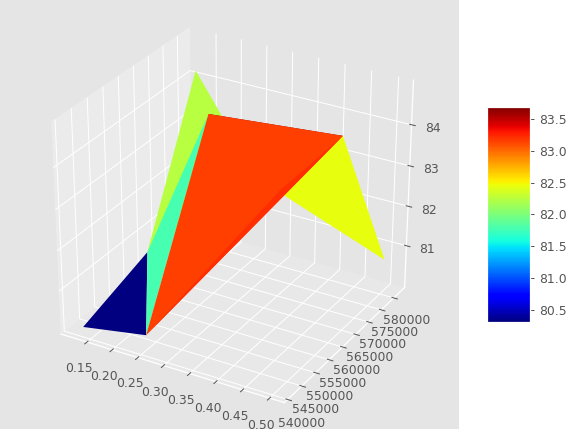

In [182]:
plt.style.use('ggplot')
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(df.drops, df.lmbdas, df.accs, cmap=cm.jet, linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)
#plt.savefig('teste.pdf')
plt.show()

In [196]:
np.random.seed(100)
drops = [0.125, 0.25]
n_reps = 2
n_lmbdas = 5
lmbdas = (np.random.uniform(50, 65, n_lmbdas)*1e4).tolist()*n_reps*len(drops)
accs = np.random.uniform(80, 85, len(lmbdas))
drops = np.repeat(drops, n_reps*n_lmbdas).tolist()

In [197]:
arrays = [drops, lmbdas]

In [205]:
len(drops)

20

In [206]:
len(lmbdas)

20

In [204]:
arrays

[[0.125,
  0.125,
  0.125,
  0.125,
  0.125,
  0.125,
  0.125,
  0.125,
  0.125,
  0.125,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25],
 [581510.7412686448,
  541755.4077640694,
  563677.6386123699,
  626716.4198479855,
  500707.8284286459,
  581510.7412686448,
  541755.4077640694,
  563677.6386123699,
  626716.4198479855,
  500707.8284286459,
  581510.7412686448,
  541755.4077640694,
  563677.6386123699,
  626716.4198479855,
  500707.8284286459,
  581510.7412686448,
  541755.4077640694,
  563677.6386123699,
  626716.4198479855,
  500707.8284286459]]

In [198]:
index = pd.MultiIndex.from_arrays(arrays, names=['drops', 'lmbdas'])

In [199]:
index

MultiIndex([(0.125, 581510.7412686448),
            (0.125, 541755.4077640694),
            (0.125, 563677.6386123699),
            (0.125, 626716.4198479855),
            (0.125, 500707.8284286459),
            (0.125, 581510.7412686448),
            (0.125, 541755.4077640694),
            (0.125, 563677.6386123699),
            (0.125, 626716.4198479855),
            (0.125, 500707.8284286459),
            ( 0.25, 581510.7412686448),
            ( 0.25, 541755.4077640694),
            ( 0.25, 563677.6386123699),
            ( 0.25, 626716.4198479855),
            ( 0.25, 500707.8284286459),
            ( 0.25, 581510.7412686448),
            ( 0.25, 541755.4077640694),
            ( 0.25, 563677.6386123699),
            ( 0.25, 626716.4198479855),
            ( 0.25, 500707.8284286459)],
           names=['drops', 'lmbdas'])

In [200]:
df2 = pd.DataFrame({'accs':accs}, index=index)

In [201]:
df2.head(40)

accs
drops lmbdas                  
0.125 581510.741269  80.607846
      541755.407764  83.353745
      563677.638612  84.129264
      626716.419848  80.683533
      500707.828429  82.875467
      581510.741269  84.456610
      541755.407764  81.046011
      563677.638612  80.926641
      626716.419848  80.541884
      500707.828429  81.098487
0.250 581510.741269  84.893119
      541755.407764  84.058416
      563677.638612  80.859705
      626716.419848  84.081124
      500707.828429  81.370369
      581510.741269  82.158521
      541755.407764  84.700149
      563677.638612  84.088247
      626716.419848  81.680560
      500707.828429  80.877052

In [211]:
group_by_lmbda = df2.groupby(level=['drops', 'lmbdas'])

In [228]:
df3 = group_by_lmbda.mean()
df3

accs
drops lmbdas                  
0.125 500707.828429  81.986977
      541755.407764  82.199878
      563677.638612  82.527952
      581510.741269  82.532228
      626716.419848  80.612709
0.250 500707.828429  81.123711
      541755.407764  84.379282
      563677.638612  82.473976
      581510.741269  83.525820
      626716.419848  82.880842

<IPython.core.display.Javascript object>


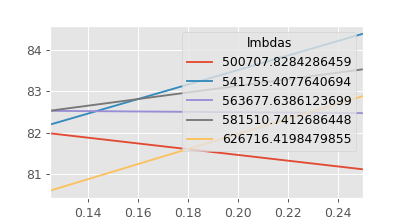

In [239]:
fig, ax = plt.subplots(figsize=(4.5,2.5))
df3.unstack()['accs'].plot(ax=ax)

In [2]:
prev_final_test_acc1 = pd.read_csv('spike_sh_14lmbdas_ar1_3lyrs_he1_75_10_non_spk_classify.csv', 
                                  index_col=0)
prev_acc_grouped_by_lmbda1 = prev_final_test_acc1.groupby('lambdas')
prev_final_acc_grouped_by_lmbda1 = prev_acc_grouped_by_lmbda1.mean()
prev_final_acc_grouped_by_lmbda1.rename(columns={'Method3':'Mean'}, inplace=True)
prev_final_acc_grouped_by_lmbda1['S.D'] = prev_acc_grouped_by_lmbda1.std()
prev_final_acc_grouped_by_lmbda1['Min'] = prev_acc_grouped_by_lmbda1.min()
prev_final_acc_grouped_by_lmbda1['Max'] = prev_acc_grouped_by_lmbda1.max()
prev_final_acc_grouped_by_lmbda1['MED'] = prev_acc_grouped_by_lmbda1.median()
prev_final_acc_grouped_by_lmbda1.reset_index(inplace=True)
display(prev_final_acc_grouped_by_lmbda1)

,lambdas,Mean,S.D,Min,Max,MED
0,0.000000,0.71909,0.013358,0.6867,0.7346,0.72165
1,75117.971405,0.78152,0.020727,0.7575,0.8158,0.77810
2,77709.422262,0.78250,0.020241,0.7608,0.8171,0.77825
3,78039.228020,0.78257,0.020269,0.7609,0.8173,0.77825
4,78417.664742,0.78260,0.020226,0.7611,0.8173,0.77825
5,79633.205489,0.78272,0.020203,0.7613,0.8177,0.77845
6,80230.053053,0.78300,0.020283,0.7614,0.8182,0.77885
7,81959.234627,0.78297,0.022364,0.7521,0.8185,0.77900
8,85612.939769,0.78450,0.021875,0.7530,0.8193,0.78235
9,88585.123545,0.78518,0.022124,0.7533,0.8197,0.78265


In [3]:
prev_final_test_acc2 = pd.read_csv('spike_sh_14lmbdas_ar1_3lyrs_he1_10_20_non_spk_classify.csv', 
                                  index_col=0)
prev_acc_grouped_by_lmbda2 = prev_final_test_acc2.groupby('lambdas')
prev_final_acc_grouped_by_lmbda2 = prev_acc_grouped_by_lmbda2.mean()
prev_final_acc_grouped_by_lmbda2.rename(columns={'Method3':'Mean'}, inplace=True)
prev_final_acc_grouped_by_lmbda2['S.D'] = prev_acc_grouped_by_lmbda2.std()
prev_final_acc_grouped_by_lmbda2['Min'] = prev_acc_grouped_by_lmbda2.min()
prev_final_acc_grouped_by_lmbda2['Max'] = prev_acc_grouped_by_lmbda2.max()
prev_final_acc_grouped_by_lmbda2['MED'] = prev_acc_grouped_by_lmbda2.median()
prev_final_acc_grouped_by_lmbda2.reset_index(inplace=True)
display(prev_final_acc_grouped_by_lmbda2)

,lambdas,Mean,S.D,Min,Max,MED
0,0.000000,0.71909,0.013358,0.6867,0.7346,0.72165
1,100471.885619,0.78694,0.020593,0.7600,0.8228,0.78455
2,110837.689046,0.78835,0.020678,0.7626,0.8240,0.78550
3,112156.912078,0.78858,0.020706,0.7631,0.8243,0.78575
4,113670.658968,0.78866,0.020647,0.7635,0.8243,0.78585
5,118532.821955,0.78888,0.021238,0.7638,0.8248,0.78630
6,120920.212212,0.78930,0.021262,0.7643,0.8249,0.78690
7,127836.938509,0.79036,0.021217,0.7647,0.8257,0.78750
8,142451.759075,0.79277,0.020593,0.7671,0.8270,0.78950
9,154340.494179,0.79669,0.018245,0.7692,0.8276,0.79450


In [4]:
prev_final_test_acc3 = pd.read_csv('spike_sh_14lmbdas_ar1_3lyrs_he1_20_45_non_spk_classify.csv', 
                                  index_col=0)
prev_acc_grouped_by_lmbda3 = prev_final_test_acc3.groupby('lambdas')
prev_final_acc_grouped_by_lmbda3 = prev_acc_grouped_by_lmbda3.mean()
prev_final_acc_grouped_by_lmbda3.rename(columns={'Method3':'Mean'}, inplace=True)
prev_final_acc_grouped_by_lmbda3['S.D'] = prev_acc_grouped_by_lmbda3.std()
prev_final_acc_grouped_by_lmbda3['Min'] = prev_acc_grouped_by_lmbda3.min()
prev_final_acc_grouped_by_lmbda3['Max'] = prev_acc_grouped_by_lmbda3.max()
prev_final_acc_grouped_by_lmbda3['MED'] = prev_acc_grouped_by_lmbda3.median()
prev_final_acc_grouped_by_lmbda3.reset_index(inplace=True)
display(prev_final_acc_grouped_by_lmbda3)

,lambdas,Mean,S.D,Min,Max,MED
0,201179.714048,0.80312,0.018350,0.7731,0.8303,0.79940
1,227094.222616,0.80550,0.018698,0.7757,0.8311,0.80060
2,230392.280196,0.80567,0.018672,0.7758,0.8311,0.80065
3,234176.647421,0.80583,0.018595,0.7759,0.8311,0.80085
4,246332.054888,0.80623,0.018735,0.7767,0.8315,0.80135
5,252300.530529,0.80687,0.019128,0.7769,0.8345,0.80195
6,269592.346273,0.80868,0.018645,0.7769,0.8352,0.80590
7,306129.397687,0.81075,0.019335,0.7781,0.8365,0.81640
8,335851.235448,0.81119,0.019834,0.7778,0.8352,0.81790
9,343773.332357,0.81128,0.019692,0.7781,0.8350,0.81765


In [5]:
prev_final_test_acc4 = pd.read_csv('spike_sh_14lmbdas_ar1_3lyrs_he1_45_65_non_spk_classify.csv', 
                                  index_col=0)
prev_acc_grouped_by_lmbda4 = prev_final_test_acc4.groupby('lambdas')
prev_final_acc_grouped_by_lmbda4 = prev_acc_grouped_by_lmbda4.mean()
prev_final_acc_grouped_by_lmbda4.rename(columns={'Method3':'Mean'}, inplace=True)
prev_final_acc_grouped_by_lmbda4['S.D'] = prev_acc_grouped_by_lmbda4.std()
prev_final_acc_grouped_by_lmbda4['Min'] = prev_acc_grouped_by_lmbda4.min()
prev_final_acc_grouped_by_lmbda4['Max'] = prev_acc_grouped_by_lmbda4.max()
prev_final_acc_grouped_by_lmbda4['MED'] = prev_acc_grouped_by_lmbda4.median()
prev_final_acc_grouped_by_lmbda4.reset_index(inplace=True)
display(prev_final_acc_grouped_by_lmbda4)

,lambdas,Mean,S.D,Min,Max,MED
0,450943.771238,0.81213,0.018777,0.7776,0.8387,0.80980
1,471675.378093,0.81269,0.018555,0.7769,0.8390,0.81290
2,474313.824157,0.81288,0.018448,0.7770,0.8390,0.81280
3,477341.317937,0.81355,0.018630,0.7768,0.8388,0.81320
4,487065.643910,0.81371,0.018603,0.7771,0.8390,0.81325
5,491840.424423,0.81358,0.018999,0.7753,0.8391,0.81335
6,505673.877019,0.81377,0.019057,0.7754,0.8388,0.81380
7,534903.518150,0.81384,0.019150,0.7764,0.8393,0.81410
8,558680.988358,0.81379,0.018741,0.7765,0.8362,0.81465
9,565018.665885,0.81382,0.018773,0.7764,0.8362,0.81480


In [6]:
df4 = prev_final_acc_grouped_by_lmbda4.copy(deep=True)
#df4.drop([0], inplace=True)

df3 = prev_final_acc_grouped_by_lmbda3.copy(deep=True)
#df3.drop([0], inplace=True)

df2 = prev_final_acc_grouped_by_lmbda2.copy(deep=True)
df2.drop([0], inplace=True)

df1 = prev_final_acc_grouped_by_lmbda1.copy(deep=True)
#df1.drop([0], inplace=True)

final_df = pd.concat([df1, df2, df3, df4], axis=0)
final_df.reset_index(inplace=True, drop=True)
final_df['lambdas']=final_df['lambdas']*30
display(final_df)

,lambdas,Mean,S.D,Min,Max,MED
0,0.000000e+00,0.71909,0.013358,0.6867,0.7346,0.72165
1,2.253539e+06,0.78152,0.020727,0.7575,0.8158,0.77810
2,2.331283e+06,0.78250,0.020241,0.7608,0.8171,0.77825
3,2.341177e+06,0.78257,0.020269,0.7609,0.8173,0.77825
4,2.352530e+06,0.78260,0.020226,0.7611,0.8173,0.77825
5,2.388996e+06,0.78272,0.020203,0.7613,0.8177,0.77845
6,2.406902e+06,0.78300,0.020283,0.7614,0.8182,0.77885
7,2.458777e+06,0.78297,0.022364,0.7521,0.8185,0.77900
8,2.568388e+06,0.78450,0.021875,0.7530,0.8193,0.78235
9,2.657554e+06,0.78518,0.022124,0.7533,0.8197,0.78265


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


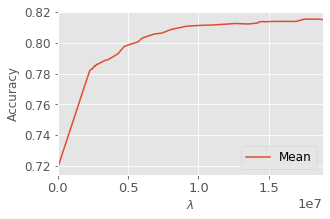

In [7]:
plt.style.use('ggplot')
mpl.rcParams['figure.figsize'] = 4.75,3.0
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
#ax=final_df.plot(y=['Mean','Max', 'Min'],x='lambdas')
ax=final_df.plot(y=['Mean'],x='lambdas')
ax.grid(b=True, which='both', color='w', linestyle='-', alpha=1.0)
ax.set_ylabel('Accuracy')
ax.set_xlabel('$\lambda$')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.savefig('../outputs/tg_mnist_results_cl/lambda_vs_acc.pdf', bbox_inches='tight')
plt.savefig('../outputs/tg_mnist_results_cl/lambda_vs_acc.png', bbox_inches='tight')
plt.savefig('../outputs/tg_mnist_results_cl/lambda_vs_acc.eps', bbox_inches='tight')
plt.show()

# New plots

In [59]:
prev_final_test_acc1 = pd.read_csv('spike_emnist_ar1_final_v6.csv', 
                                  index_col=0)
prev_acc_grouped_by_lmbda1 = prev_final_test_acc1.groupby('lmbdas')
prev_final_test_acc1.head(10)

,1,2,3,4,5,6,7,8,9,10
lmbdas,,,,,,,,,,
0.000000e+00,0.9880,0.94825,0.901167,0.804750,0.7321,0.694833,0.650000,0.616538,0.585174,0.562181
9.437712e+04,0.9880,0.94850,0.900833,0.804500,0.7325,0.695500,0.650357,0.617115,0.584651,0.562500
2.431382e+06,0.9880,0.94750,0.899667,0.806375,0.7362,0.710000,0.652643,0.619808,0.590349,0.569840
5.567388e+06,0.9880,0.94675,0.903167,0.808250,0.7418,0.721333,0.679500,0.656474,0.630349,0.604894
8.490352e+06,0.9880,0.94725,0.901167,0.811625,0.7507,0.731833,0.686429,0.666474,0.640058,0.617074
1.086810e+07,0.9880,0.94675,0.900500,0.814125,0.7535,0.734333,0.686786,0.662692,0.636105,0.613670
1.341498e+07,0.9880,0.94625,0.901500,0.814250,0.7548,0.737083,0.689929,0.667244,0.639942,0.618032
1.689552e+07,0.9880,0.94575,0.900667,0.815875,0.7577,0.738000,0.689500,0.668462,0.641105,0.619309
0.000000e+00,0.9895,0.94425,0.903500,0.796875,0.7230,0.684667,0.649286,0.615064,0.578198,0.550957


In [60]:
prev_final_acc_grouped_by_lmbda1 = prev_acc_grouped_by_lmbda1.mean()
prev_final_acc_grouped_by_lmbda1

,1,2,3,4,5,6,7,8,9,10
lmbdas,,,,,,,,,,
0.000000e+00,0.98925,0.946708,0.903972,0.804250,0.731017,0.686069,0.648857,0.615726,0.581696,0.556312
9.437712e+04,0.98925,0.946750,0.903861,0.804042,0.731233,0.686806,0.649345,0.615545,0.581153,0.556011
2.431382e+06,0.98925,0.945833,0.903444,0.809104,0.736700,0.696931,0.649560,0.615235,0.585756,0.563333
5.567388e+06,0.98925,0.945292,0.901944,0.812667,0.744367,0.712722,0.667667,0.639925,0.615591,0.593067
8.490352e+06,0.98925,0.945000,0.901750,0.815792,0.750050,0.724167,0.674095,0.649519,0.624680,0.602376
1.086810e+07,0.98925,0.944750,0.901139,0.817604,0.753650,0.729319,0.679190,0.655256,0.629952,0.607890
1.341498e+07,0.98925,0.944458,0.901083,0.815813,0.754467,0.732181,0.681893,0.659209,0.633953,0.611622
1.689552e+07,0.98925,0.944333,0.900194,0.814271,0.754500,0.733514,0.681643,0.660150,0.635165,0.612846


In [61]:
prev_final_acc_grouped_by_lmbda1.reset_index()

,lmbdas,1,2,3,4,5,6,7,8,9,10
0,0.000000e+00,0.98925,0.946708,0.903972,0.804250,0.731017,0.686069,0.648857,0.615726,0.581696,0.556312
1,9.437712e+04,0.98925,0.946750,0.903861,0.804042,0.731233,0.686806,0.649345,0.615545,0.581153,0.556011
2,2.431382e+06,0.98925,0.945833,0.903444,0.809104,0.736700,0.696931,0.649560,0.615235,0.585756,0.563333
3,5.567388e+06,0.98925,0.945292,0.901944,0.812667,0.744367,0.712722,0.667667,0.639925,0.615591,0.593067
4,8.490352e+06,0.98925,0.945000,0.901750,0.815792,0.750050,0.724167,0.674095,0.649519,0.624680,0.602376
5,1.086810e+07,0.98925,0.944750,0.901139,0.817604,0.753650,0.729319,0.679190,0.655256,0.629952,0.607890
6,1.341498e+07,0.98925,0.944458,0.901083,0.815813,0.754467,0.732181,0.681893,0.659209,0.633953,0.611622
7,1.689552e+07,0.98925,0.944333,0.900194,0.814271,0.754500,0.733514,0.681643,0.660150,0.635165,0.612846


In [62]:
req_data1 = {}

req_data1['lambda'] = prev_final_acc_grouped_by_lmbda1.reset_index()['lmbdas']
req_data1['Mean'] = prev_acc_grouped_by_lmbda1.mean().reset_index()['10']

prev_final_acc_grouped_by_lmbda1 = prev_acc_grouped_by_lmbda1.min()
req_data1['Min'] = prev_acc_grouped_by_lmbda1.min().reset_index()['10']

prev_final_acc_grouped_by_lmbda1 = prev_acc_grouped_by_lmbda1.max()
req_data1['Max'] = prev_acc_grouped_by_lmbda1.max().reset_index()['10']

prev_final_acc_grouped_by_lmbda1 = prev_acc_grouped_by_lmbda1.std()
req_data1['S.D'] = prev_acc_grouped_by_lmbda1.std().reset_index()['10']

req_data1 = pd.DataFrame(req_data1)
req_data1

,lambda,Mean,Min,Max,S.D
0,0.000000e+00,0.556312,0.548777,0.566064,0.006617
1,9.437712e+04,0.556011,0.546064,0.566862,0.007631
2,2.431382e+06,0.563333,0.556436,0.569840,0.005092
3,5.567388e+06,0.593067,0.581330,0.604894,0.008765
4,8.490352e+06,0.602376,0.593351,0.617074,0.008144
5,1.086810e+07,0.607890,0.600479,0.613670,0.004368
6,1.341498e+07,0.611622,0.608404,0.618032,0.004184
7,1.689552e+07,0.612846,0.604574,0.619309,0.005129


In [63]:
prev_final_test_acc2 = pd.read_csv('spike_emnist_ar1_final_v7.csv', 
                                  index_col=0)
prev_acc_grouped_by_lmbda2 = prev_final_test_acc2.groupby('lmbdas')
prev_final_test_acc2.head(10)

,1,2,3,4,5,6,7,8,9,10
lmbdas,,,,,,,,,,
1.005663e+06,0.9880,0.94475,0.891333,0.806875,0.7513,0.734583,0.690714,0.671538,0.642674,0.620319
1.145883e+06,0.9880,0.94525,0.889000,0.805000,0.7481,0.732417,0.689143,0.670833,0.641512,0.618245
1.334043e+06,0.9880,0.94325,0.887333,0.804625,0.7467,0.729667,0.681786,0.664679,0.636977,0.615213
1.509421e+06,0.9880,0.94325,0.886667,0.800625,0.7435,0.728917,0.681643,0.661410,0.634070,0.612979
1.652086e+06,0.9880,0.94325,0.886333,0.800750,0.7424,0.727500,0.682857,0.662564,0.636221,0.613032
1.804899e+06,0.9880,0.94450,0.886000,0.798875,0.7421,0.727000,0.684143,0.663654,0.636337,0.614309
1.991023e+06,0.9880,0.94450,0.883500,0.797125,0.7403,0.724833,0.685286,0.666026,0.638605,0.616223
2.013731e+06,0.9880,0.94450,0.883667,0.796875,0.7403,0.724667,0.685286,0.665897,0.638837,0.616383
1.005663e+06,0.9895,0.94275,0.891000,0.812125,0.7519,0.731750,0.683357,0.660962,0.635000,0.613511


In [64]:
prev_final_acc_grouped_by_lmbda2 = prev_acc_grouped_by_lmbda2.mean()
prev_final_acc_grouped_by_lmbda2

,1,2,3,4,5,6,7,8,9,10
lmbdas,,,,,,,,,,
1.005663e+06,0.98925,0.944000,0.889972,0.805854,0.747817,0.727861,0.682060,0.659840,0.632829,0.611268
1.145883e+06,0.98925,0.943708,0.888444,0.805083,0.746950,0.726847,0.682226,0.660096,0.632771,0.611312
1.334043e+06,0.98925,0.943625,0.889083,0.808042,0.750000,0.729097,0.683083,0.661464,0.635145,0.613856
1.509421e+06,0.98925,0.943250,0.888250,0.806000,0.747950,0.728222,0.685393,0.664071,0.637781,0.616268
1.652086e+06,0.98925,0.943250,0.887472,0.805250,0.747117,0.727778,0.685500,0.664060,0.637481,0.615869
1.804899e+06,0.98925,0.943375,0.886833,0.803917,0.745833,0.726389,0.683738,0.662596,0.636153,0.615018
1.991023e+06,0.98925,0.943417,0.885889,0.803292,0.744183,0.725319,0.682286,0.661603,0.635242,0.614105
2.013731e+06,0.98925,0.943417,0.885861,0.803146,0.744267,0.725125,0.682310,0.661592,0.635320,0.614069


In [65]:
prev_final_acc_grouped_by_lmbda2.reset_index()

,lmbdas,1,2,3,4,5,6,7,8,9,10
0,1.005663e+06,0.98925,0.944000,0.889972,0.805854,0.747817,0.727861,0.682060,0.659840,0.632829,0.611268
1,1.145883e+06,0.98925,0.943708,0.888444,0.805083,0.746950,0.726847,0.682226,0.660096,0.632771,0.611312
2,1.334043e+06,0.98925,0.943625,0.889083,0.808042,0.750000,0.729097,0.683083,0.661464,0.635145,0.613856
3,1.509421e+06,0.98925,0.943250,0.888250,0.806000,0.747950,0.728222,0.685393,0.664071,0.637781,0.616268
4,1.652086e+06,0.98925,0.943250,0.887472,0.805250,0.747117,0.727778,0.685500,0.664060,0.637481,0.615869
5,1.804899e+06,0.98925,0.943375,0.886833,0.803917,0.745833,0.726389,0.683738,0.662596,0.636153,0.615018
6,1.991023e+06,0.98925,0.943417,0.885889,0.803292,0.744183,0.725319,0.682286,0.661603,0.635242,0.614105
7,2.013731e+06,0.98925,0.943417,0.885861,0.803146,0.744267,0.725125,0.682310,0.661592,0.635320,0.614069


In [67]:
req_data2 = {}

prev_final_acc_grouped_by_lmbda2 = prev_acc_grouped_by_lmbda2.mean()
req_data2['lambda'] = prev_final_acc_grouped_by_lmbda2.reset_index()['lmbdas']
req_data2['Mean'] = prev_final_acc_grouped_by_lmbda2.reset_index()['10']

prev_final_acc_grouped_by_lmbda2 = prev_acc_grouped_by_lmbda2.min()
req_data2['Min'] = prev_final_acc_grouped_by_lmbda2.reset_index()['10']

prev_final_acc_grouped_by_lmbda2 = prev_acc_grouped_by_lmbda2.max()
req_data2['Max'] = prev_final_acc_grouped_by_lmbda2.reset_index()['10']

prev_final_acc_grouped_by_lmbda2 = prev_acc_grouped_by_lmbda2.std()
req_data2['S.D'] = prev_final_acc_grouped_by_lmbda2.reset_index()['10']

req_data2 = pd.DataFrame(req_data2)
req_data2

,lambda,Mean,Min,Max,S.D
0,1.005663e+06,0.611268,0.596436,0.620532,0.009064
1,1.145883e+06,0.611312,0.594362,0.619947,0.009084
2,1.334043e+06,0.613856,0.609096,0.619840,0.003675
3,1.509421e+06,0.616268,0.609681,0.621649,0.004825
4,1.652086e+06,0.615869,0.609734,0.622660,0.004568
5,1.804899e+06,0.615018,0.606968,0.620638,0.005084
6,1.991023e+06,0.614105,0.606809,0.618723,0.004759
7,2.013731e+06,0.614069,0.606543,0.618723,0.004855


In [68]:
all_data = pd.concat([req_data1, req_data1])
all_data = all_data.reset_index(drop=True)
all_data
all_data = all_data.sort_values(by=['lambda'])
all_data

,lambda,Mean,Min,Max,S.D
0,0.000000e+00,0.556312,0.548777,0.566064,0.006617
8,0.000000e+00,0.556312,0.548777,0.566064,0.006617
1,9.437712e+04,0.556011,0.546064,0.566862,0.007631
9,9.437712e+04,0.556011,0.546064,0.566862,0.007631
2,2.431382e+06,0.563333,0.556436,0.569840,0.005092
10,2.431382e+06,0.563333,0.556436,0.569840,0.005092
3,5.567388e+06,0.593067,0.581330,0.604894,0.008765
11,5.567388e+06,0.593067,0.581330,0.604894,0.008765
4,8.490352e+06,0.602376,0.593351,0.617074,0.008144
12,8.490352e+06,0.602376,0.593351,0.617074,0.008144


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


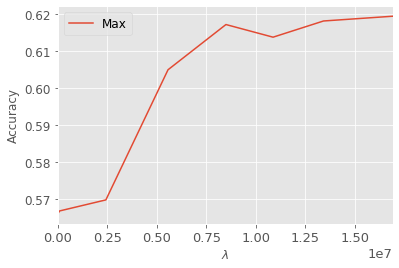

In [70]:
plt.style.use('ggplot')
mpl.rcParams['figure.figsize'] = 6,4.0
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
#ax=final_df.plot(y=['Mean','Max', 'Min'],x='lambdas')
ax=all_data.plot(y=['Max'],x='lambda')
ax.grid(b=True, which='both', color='w', linestyle='-', alpha=1.0)
ax.set_ylabel('Accuracy')
ax.set_xlabel('$\lambda$')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.savefig('../outputs/tg_mnist_results_cl/emnist_lambda_vs_acc.pdf', bbox_inches='tight')
plt.savefig('../outputs/tg_mnist_results_cl/emnist_lambda_vs_acc.png', bbox_inches='tight')
plt.savefig('../outputs/tg_mnist_results_cl/emnist_lambda_vs_acc.eps', bbox_inches='tight')
plt.show()